# About Time regression

## 시계열 분석과 기계학습의 차이
- 확률과정(Stochastic Process): 상관관계를 가지는 무한개의 변수의 순서열
- 시계열 데이터(Time Series Data): 일정한 시간 간격으로 기록된 확률과정의 샘플

    - 독립변수($x_t$)와 알고자 하는 종속변수($y_t$)가 시간 단위($t$)를 포함
    - 모델의 출력(Output)은 $y$의 시간$t$에서의 예측값
    - 기계학습과 시계열 예측 간 큰 차이가 존재하기에, 시계열 변수 생성은 약간의 조정들을 요구함
    
## 시계열 변수
**신규 변수를 생성하는 것은 분석에서 가장 중요하고 시간이 많이 걸리는 작업**  

<br>
변수 생성 주의점
1. 미래의 실제 종속변수 예측 값이 어떤 독립/종속 변수의 FE에 의해 효과가 있을 지 단정할 수 없음
2. 독립변수의 예측값을 FE를 통해 생성될 수 있지만 이는 종속변수의 예측에 오류 증가를 야기할 수 있음

### 1. 빈도 (Frequency)
- 계절성 패턴(Sessonality)이 나타나기 전까지의 데이터 갯수를 사람이 정해야 함
    - 계절성이 1년에 1회 나타날 경우(1년 1회, 분기 4회, 월 12회, 주 52회)
- 계절성이 일(day) 단위로 나타날 경우 (주별 7회, 연 365회)

### 2. 추세 (Trend)
- 시계열이 시간에 따라 증가, 감소 또는 일정 수준을 유지하는 경우
- $Y_t = f(t)+Y_{st}$
    - 확률과정($Y_t$)이 추정이 가능한 결정론 추세함수($f(t))$)와 정상확률과정($Y_{st}$, Trend로 설명하기 어려운 오차)의 합
![image](https://user-images.githubusercontent.com/70187490/149255989-c7eff731-aaef-49d5-a94e-e16ee7296031.png)
    
### 3. 계절성 (Seasonality, St)
- 일정한 빈도로 주기적으로 반복되는 패턴($m$), 특정한 달/요일에 따라 기대값이 달라지는 것
- 계절성반영 방법은 크게 2가지로 구분
    1. 수치값 그대로 사용
    2. 발생 시점으로 분리
- 주기적 패턴이 12개월마다 반복이 되었다면 $m=12$
![image](https://user-images.githubusercontent.com/70187490/149255956-1389bebe-14b4-43a2-b9bf-e6e18a63b6df.png)

### 4. 주기(Cycle, Ct)
- 일정하지 않은 빈도로 발생하는 패턴(계절성)
- 빈도가 1인 경우에도 발생 가능($m=1$)
![image](https://user-images.githubusercontent.com/70187490/149256147-3182237f-fd59-441a-bcce-dc4a3d0de550.png)

### 5. 시계열 분해(추세/ 계절성/ 잔차)
![image](https://user-images.githubusercontent.com/70187490/149256227-fc9606b3-3d55-4d9b-8554-40f8449b874e.png)
- 추세/ 계절성/ 추세와 계절성을 제거한 잔차를 볼수 있다.
- $Y_t = \text{Trend} + \text{Seasonality} + \text{Residual}$

### 6. 더미변수
![image](https://user-images.githubusercontent.com/70187490/149257866-59b8ee4a-dd1f-416d-bac0-1aefe08e5799.png)
- 이진수( 0 또는 1 )의 형태로 변수를 생성하는 것으로 휴일, 이벤트, 캠페인, Outlier 등을 생성 가능
- 생성법:
    - 범주형 변수(Categorical Variable)의 기준값을 미리 결정(ex. 계절일 경우 봄)
    - 기준값을 제외한 채 더미변수를 생성(ex. D1= 여름, D2=가을, D3=겨울)
    - 각 더미변수의 값을 0 또는 1로 채우며 1은 각 더미 변수의 정의와 같음
- 확실한 패턴이 존재하는 경우에만 효과가 있으며 더미변수의 무분별한 추가는 오히려 모델의 오류를 증가시킬 수 있음

### 7. 지연값 (Lagged values, $Lag_t(X_1)$)
![image](https://user-images.githubusercontent.com/70187490/149258122-5f39c658-c389-4ec1-baad-f64254a37847.png)
- 변수의 지연된 값을 독립변수로 반영하는 것으로, ARIMA, VAR, NNAR 등이 활용
- 만약 2017년 1월 1일에 광고비를 집행했다면 이에 따른 매출 변화는 몇일 뒤일 것이다. 이처럼 $X_t$가 매출로 발생하는 데 시간이 걸리는 것이라면 시간 정보를 반영하여 매출이 발생할 것이라고 하는 시점으로 옮기는 것이다.
- 위의 표에서 만약 1월 6일의 데이터는 1월 5일과 1월 4일의 액션에 영향을 받게 하는 것이다.
- 즉, 시차/시간에 따른 차이를 반영할 수 있다.

### 8. 시간변수
- 시간 변수를 미시/거시적으로 분리하거나 통합하여 생성된 변수
- 예를 들어 timestampe(2021-01-13-01:23:52)을 년월일 등으로 세분화하는 것이다.
- 요약:
    - 시계열 구성요소는 각 변수의 시간패턴을 파악하는데 중요
    - FE를 통해 생성된변수의 입력(input)형태로 모형 선택을 하는데 필요
    - 생성된 변수의 패턴이 기존 모델에서 반영하지 않던 패턴이라면 예측 성능을 높임
    - 예측 성능 향상 뿐 아니라 결과를 해석하고 해당 속성을 분석하며 가능한 원인 식별에 도움
    
# 코드 분석
## Import library and Dataset

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10
pd.options.display.max_columns=50

import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
raw_all = pd.read_csv('../../../Bike_Sharing_Demand_Full.csv')

print(raw_all.shape)
raw_all.head()

(17379, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


## Feature Engineering: 데이터에서 시계열패턴 추출하기

In [3]:
raw_all['datetime'] = pd.to_datetime(raw_all['datetime'])
raw_all.set_index('datetime', inplace=True)


raw_all.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


### 데이터를 시간단위로 만들기

In [4]:
print(raw_all.asfreq('H').index)   # 시간단위로 되어있음
raw_all.asfreq('H').isnull().sum() # 165개의 데이터가 비어있음

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=17544, freq='H')


season        165
holiday       165
workingday    165
weather       165
temp          165
             ... 
humidity      165
windspeed     165
casual        165
registered    165
count         165
Length: 11, dtype: int64

In [5]:
raw_all.asfreq('H')[ raw_all.asfreq('H').isnull().sum(axis=1) > 0 ] # 아래 시간대가 빠져있다.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-02 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2012-10-30 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-08 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-29 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 앞에 있는 데이터로 뒤에 있는 값을 채운다.
# 3시가 비어 있으면 2시의 데이터로 가져다 채운다.
raw_all = raw_all.asfreq('H', method='ffill') 

In [7]:
raw_all.isnull().sum().sum()

0

## Target 변수 시각화 및 시계열 분해
- 타겟 변수인 count와 count와 관련이 있는 'registered', 'casual'을 비교하면 다음과 같다.

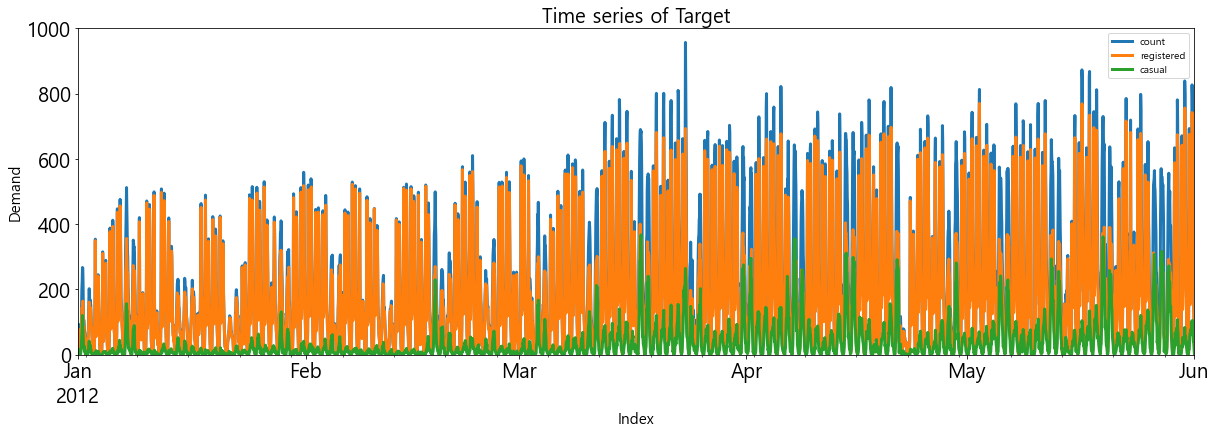

In [8]:
raw_all[['count', 'registered', 'casual']].plot(kind='line',
                                                figsize=(20, 6), 
                                                linewidth=3,
                                                fontsize=20, 
                                                xlim=('2012-01-01', '2012-06-01'),
                                                ylim=(0, 1000))
plt.title('Time series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

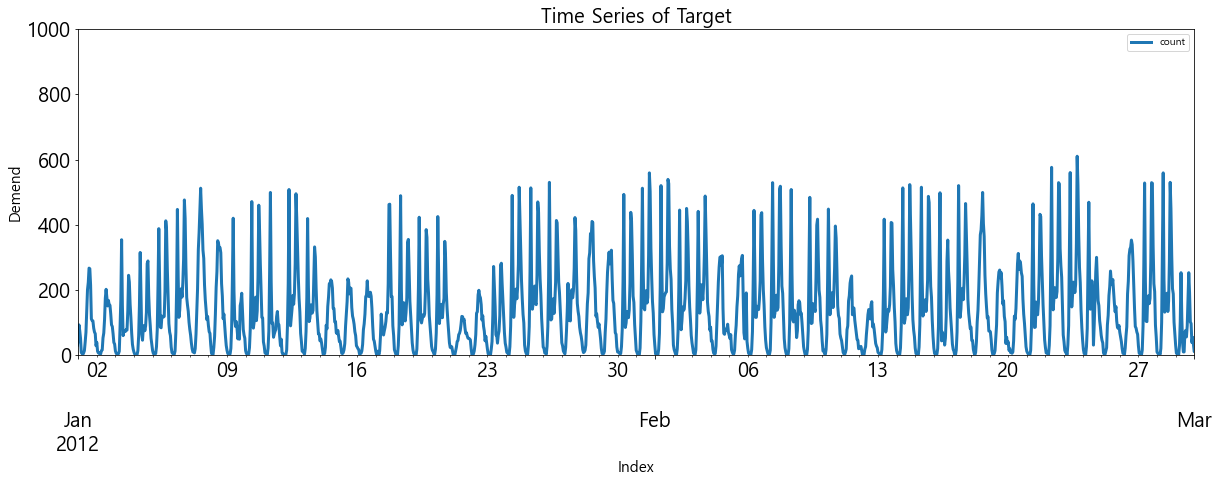

In [9]:
# Line plot of Y
raw_all[['count']].plot(kind='line', figsize=(20, 6),
                        linewidth=3, fontsize=20,
                        xlim=('2012-01-01', '2012-03-01'), 
                        ylim=(0, 1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demend', fontsize=15);

## 시계열 분해

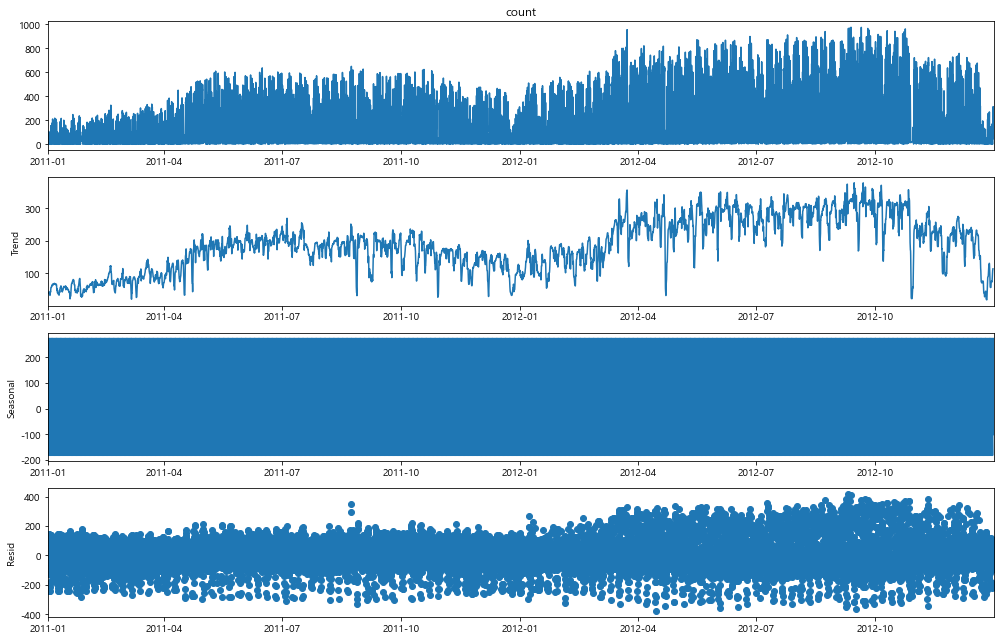

In [10]:
# split data as trend + seasonal + residual
plt.rcParams['figure.figsize'] = (14, 9)
sm.tsa.seasonal_decompose(raw_all['count'], model='additive').plot();

In [11]:
# 수치로도 살펴 볼 수 있다.
result= sm.tsa.seasonal_decompose(raw_all['count'], model='additive')
result.observed

datetime
2011-01-01 00:00:00    16.00
2011-01-01 01:00:00    40.00
2011-01-01 02:00:00    32.00
2011-01-01 03:00:00    13.00
2011-01-01 04:00:00     1.00
                       ...  
2012-12-31 19:00:00   119.00
2012-12-31 20:00:00    89.00
2012-12-31 21:00:00    90.00
2012-12-31 22:00:00    61.00
2012-12-31 23:00:00    49.00
Freq: H, Name: count, Length: 17544, dtype: float64

In [12]:
result.trend

datetime
2011-01-01 00:00:00   NaN
2011-01-01 01:00:00   NaN
2011-01-01 02:00:00   NaN
2011-01-01 03:00:00   NaN
2011-01-01 04:00:00   NaN
                       ..
2012-12-31 19:00:00   NaN
2012-12-31 20:00:00   NaN
2012-12-31 21:00:00   NaN
2012-12-31 22:00:00   NaN
2012-12-31 23:00:00   NaN
Freq: H, Name: trend, Length: 17544, dtype: float64

- trend에 nan이 출력되는 이유는 초반과 끝부분에 값이 없기 때문
- 해당 데이터는 12개의 트렌드를 추론하는데 사용

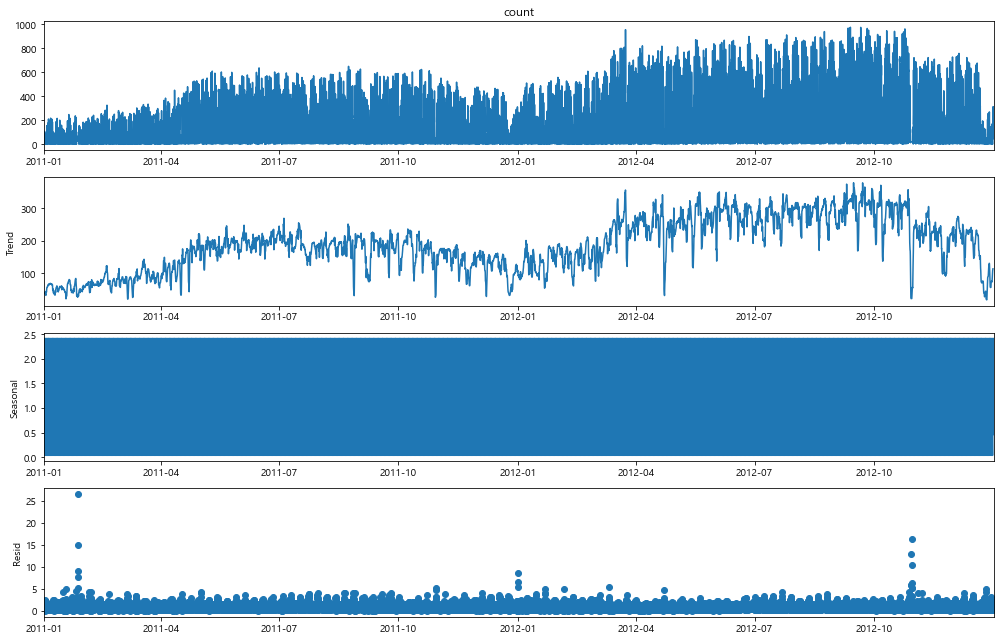

In [13]:
# split data as trend * seasonal *residual
sm.tsa.seasonal_decompose(raw_all['count'], model='multiplicative').plot();

- 도메인의 특성에 따라 additive, multiplicative를 선택

In [14]:
# fill nan as some values of data
result = sm.tsa.seasonal_decompose(raw_all['count'], model='additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend.fillna(method='ffill', inplace=True)
Y_trend.fillna(method='bfill', inplace=True)
Y_trend.columns=['count_trend']

Y_trend.head()

,count_trend
datetime,
2011-01-01 00:00:00,41.06
2011-01-01 01:00:00,41.06
2011-01-01 02:00:00,41.06
2011-01-01 03:00:00,41.06
2011-01-01 04:00:00,41.06


In [15]:
Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True)
Y_seasonal.fillna(method='bfill', inplace=True)
Y_seasonal.columns = ['count_seasonal']
Y_seasonal.head()

,count_seasonal
datetime,
2011-01-01 00:00:00,-134.25
2011-01-01 01:00:00,-154.75
2011-01-01 02:00:00,-165.27
2011-01-01 03:00:00,-176.48
2011-01-01 04:00:00,-181.67


In [16]:
# merging several columns
raw_all = pd.concat([raw_all, Y_trend, Y_seasonal], axis=1)
raw_all.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67


## 이동평균(moving average) 계산

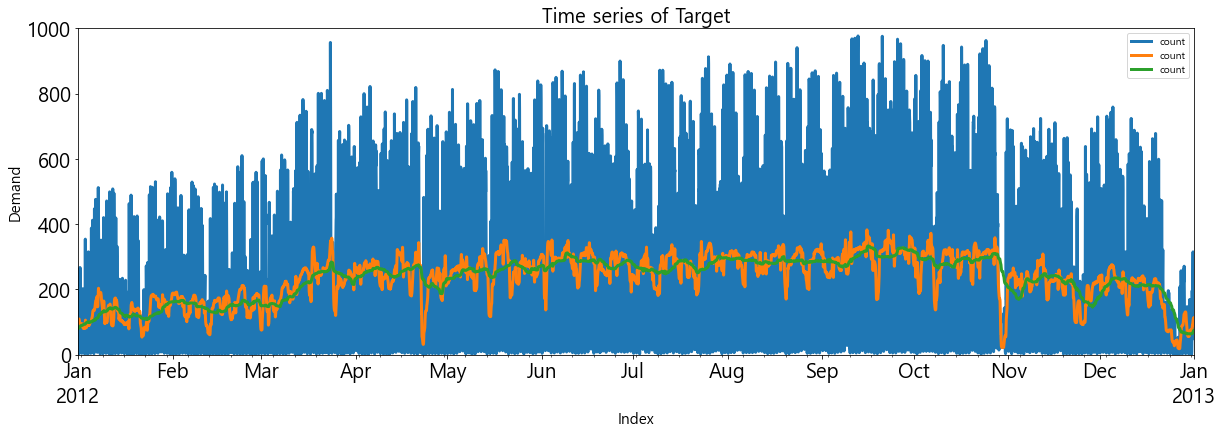

In [17]:
# comparison of several moving average values
pd.concat([raw_all[['count']],   # 시간정보(파랑)
           raw_all[['count']].rolling(24).mean(), # 데일리 패턴을 살펴봄
           raw_all[['count']].rolling(24*7).mean()], axis=1).plot(kind='line',
                                                                  figsize=(20, 6),
                                                                  linewidth=3,
                                                                  fontsize=20,
                                                                  xlim=('2012-01-01', '2013-01-01'),
                                                                  ylim=(0, 1000))
plt.title('Time series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

In [18]:
# fill nan as some values and merging
Y_count_Day = raw_all[['count']].rolling(24).mean()

# 24개를 합쳤기 때문에 nan가 존재하며 이를 대체함
Y_count_Day.fillna(method='ffill', inplace=True)  
Y_count_Day.fillna(method='bfill', inplace=True)
Y_count_Day.columns=['count_Day']

Y_count_Week = raw_all[['count']].rolling(24*7).mean()
Y_count_Week.fillna(method='ffill', inplace=True)
Y_count_Week.fillna(method='bfill', inplace=True)
Y_count_Week.columns = ['count_Week']

raw_all = pd.concat([raw_all, Y_count_Day], axis=1)
raw_all = pd.concat([raw_all, Y_count_Week], axis=1)
raw_all.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11


## 증감폭 계산

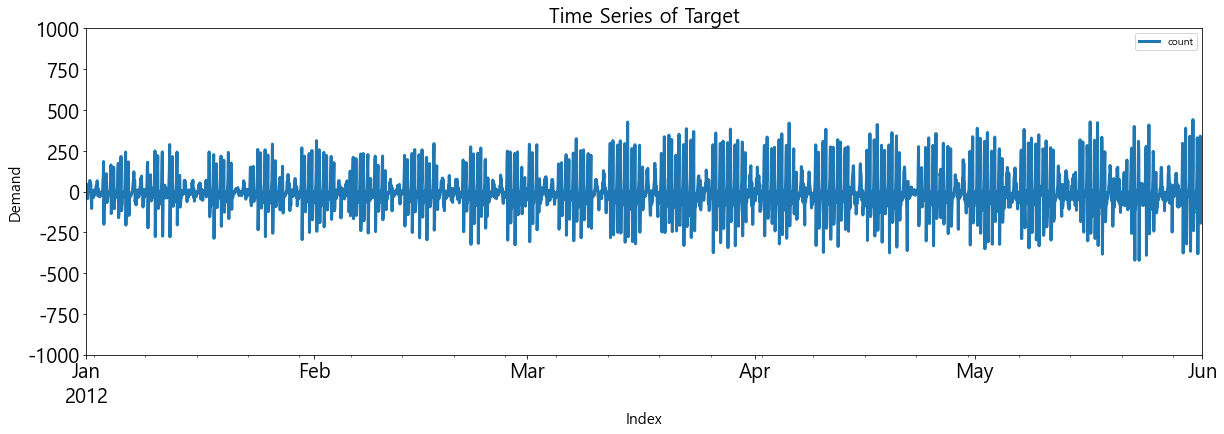

In [19]:
# line plot of Y for specific periods
# 바뀌는 차이를 알고 싶을 경우엔 diff()를 사용, 증감폭을 알 수 있음

raw_all[['count']].diff().plot(kind='line', figsize=(20, 6), 
                               linewidth=3, fontsize=20,
                               xlim=('2012-01-01', '2012-06-01'), 
                               ylim=(-1000, 1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15);

In [20]:
# diff of Y and merging 
Y_diff = raw_all[['count']].diff()
Y_diff.fillna(method='ffill', inplace=True)
Y_diff.fillna(method='bfill', inplace=True)
Y_diff.columns = ['count_diff']

raw_all = pd.concat([raw_all, Y_diff], axis=1)
raw_all.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00


## 그룹화하기(등급 나누기)

In [21]:
# 온도로 그룹하기
pd.cut(raw_all['temp'], 5) # 값들을 5개의 그룹으로 분할 (그룹 개수에 따라 값이 다름)

datetime
2011-01-01 00:00:00    (8.856, 16.892]
2011-01-01 01:00:00    (8.856, 16.892]
2011-01-01 02:00:00    (8.856, 16.892]
2011-01-01 03:00:00    (8.856, 16.892]
2011-01-01 04:00:00    (8.856, 16.892]
                            ...       
2012-12-31 19:00:00    (8.856, 16.892]
2012-12-31 20:00:00    (8.856, 16.892]
2012-12-31 21:00:00    (8.856, 16.892]
2012-12-31 22:00:00    (8.856, 16.892]
2012-12-31 23:00:00    (8.856, 16.892]
Freq: H, Name: temp, Length: 17544, dtype: category
Categories (5, interval[float64]): [(0.78, 8.856] < (8.856, 16.892] < (16.892, 24.928] < (24.928, 32.964] < (32.964, 41.0]]

In [22]:
# split values as some group
raw_all['temp_group'] = pd.cut(raw_all['temp'], 10)  # 10개의 그룹으로 분할
raw_all.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00,"(8.856, 12.874]"
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00,"(8.856, 12.874]"
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00,"(8.856, 12.874]"
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00,"(8.856, 12.874]"
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00,"(8.856, 12.874]"


## 누적 분기 칼럼 만들기

In [23]:
raw_all.reset_index(inplace=True)

# feature extraction of time information (년, 분기 추출)
raw_all['Year'] = raw_all.datetime.dt.year
raw_all['Quater'] = raw_all.datetime.dt.quarter

# 누적 분기 구하기
raw_all['Quater_ver2'] = raw_all['Quater'] + (raw_all.Year - raw_all.Year.min()) * 4
raw_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group,Year,Quater,Quater_ver2
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00,"(8.856, 12.874]",2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00,"(8.856, 12.874]",2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00,"(8.856, 12.874]",2011,1,1


## 분기 변수 더미 변수화

In [24]:
pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy', drop_first=True)
# prefix: 컬럼에 이름 붙이기
# drop_first=True더미를 만들 때 카테고리 수를 하나를 줄여야 한다

raw_all = pd.concat([raw_all, pd.get_dummies(raw_all['Quater'], prefix='Quater_Dummy', drop_first=True)],axis=1)
raw_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group,Year,Quater,Quater_ver2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00,"(8.856, 12.874]",2011,1,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00,"(8.856, 12.874]",2011,1,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00,"(8.856, 12.874]",2011,1,1,0,0,0


## 시간 정보 추출(datetime.dt 이용)

In [25]:
# feature extraction of time information

raw_all['Month'] = raw_all.datetime.dt.month
raw_all['Day'] = raw_all.datetime.dt.day
raw_all['Hour'] = raw_all.datetime.dt.hour
raw_all['DayofWeek'] = raw_all.datetime.dt.dayofweek
raw_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group,Year,Quater,Quater_ver2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,Month,Day,Hour,DayofWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,4,5


## 지연값 추출

In [27]:
raw_all['count'].shift(1) # 1 시간(1 row) 지연값 -> 날짜가 오름차순일 때 +

0          NaN
1        16.00
2        40.00
3        32.00
4        13.00
         ...  
17539   122.00
17540   119.00
17541    89.00
17542    90.00
17543    61.00
Name: count, Length: 17544, dtype: float64

In [28]:
raw_all['count'].shift(-2) # 2 시간 앞에 값, 날짜가 내림차순이라면 -를 사용

0       32.00
1       13.00
2        1.00
3        1.00
4        2.00
         ... 
17539   90.00
17540   61.00
17541   49.00
17542     NaN
17543     NaN
Name: count, Length: 17544, dtype: float64

In [29]:
# calculation of lags of Y
raw_all['count_lag1'] = raw_all['count'].shift(1)
raw_all['count_lag2'] = raw_all['count'].shift(2)

# fill nan as some values
raw_all['count_lag1'].fillna(method='bfill', inplace=True)
raw_all['count_lag2'].fillna(method='bfill', inplace=True)

raw_all.set_index('datetime', inplace=True)
raw_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group,Year,Quater,Quater_ver2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,Month,Day,Hour,DayofWeek,count_lag1,count_lag2
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,0,5,16.00,16.00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,1,5,16.00,16.00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,2,5,40.00,16.00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,3,5,32.00,40.00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,4,5,13.00,32.00


In [41]:
raw_all

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,temp_group,Year,Quater,Quater_ver2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4,Month,Day,Hour,DayofWeek,count_lag1,count_lag2
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,0,5,16.00,16.00
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,1,5,16.00,16.00
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,2,5,40.00,16.00
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,3,5,32.00,40.00
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00,"(8.856, 12.874]",2011,1,1,0,0,0,1,1,4,5,13.00,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30,-3.00,"(8.856, 12.874]",2012,4,8,0,0,1,12,31,19,0,122.00,164.00
2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70,-30.00,"(8.856, 12.874]",2012,4,8,0,0,1,12,31,20,0,119.00,122.00
2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10,1.00,"(8.856, 12.874]",2012,4,8,0,0,1,12,31,21,0,89.00,119.00


## Train/test set으로 분리

In [32]:
### Data split of time series

def DataSplit_ts(raw, Y_colname, X_colname, criteria):
    
    raw_train = raw.loc[raw.index < criteria, :]
    raw_test = raw.loc[raw.index >= criteria, :]
    
    y_train = raw_train[Y_colname]
    X_train = raw_train[X_colname]
    
    y_test = raw_test[Y_colname]
    X_test = raw_test[X_colname]
    
    return X_train, X_test, y_train, y_test

In [42]:
Y_colname = ['count']
X_remove = ['datetime', 'temp_group', 'casual', 'registered']
X_colname = [ x for x in raw_all.columns if x not in Y_colname+X_remove ]

X_train, X_test, y_train, y_test = DataSplit_ts(raw_all, Y_colname, X_colname, '2012-07-01')

## 기본 모델링

In [43]:
fit_reg1 = sm.OLS(y_train, X_train).fit()
display(fit_reg1.summary())

pred_tr_reg1 = fit_reg1.predict(X_train).values
pred_te_reg1 = fit_reg1.predict(X_test).values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.362e+08
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:19:03   Log-Likelihood:                 1906.2
No. Observations:               13128   AIC:                            -3764.
Df Residuals:                   13104   BIC:                            -3585.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
season            -0.0005      0.004     -0.132      0.895      -0.009       0.008
holiday            0.0087      0.014      0.644      0.520      -0.018       0.035
workingday         0.0078      0.007      1.180      0.238      -0.005       0.021
weather            0.0043      0.003      1.254      0.210      -0.002       0.011
temp               0.0023      0.002      1.082      0.279      -0.002       0.006
atemp             -0.0025      0.002     -1.356      0.175      -0.006       0.001
humidity          -0.0001      0.000     -0.838      0.402      -0.000       0.000
windspeed          0.0003      0.000      1.078      0.281      -0.000       0.001
count_trend      9.24e-05   8.57e-05      1.078      0.281   -7.57e-05       0.000
count_seasonal  1.925e-05   2.57e-05      0.749      0.454   -3.11e-05    6.96e-05
count_Day       4.128e-05   8.36e-05      0.494      0.621      -0.000       0.000
count_Week     -4.317e-05   9.61e-05     -0.449      0.653      -0.000       0.000
count_diff         1.0000    2.9e-05   3.45e+04      0.000       1.000       1.000
Year           -1.398e-05   7.64e-06     -1.831      0.067   -2.89e-05    9.85e-07
Quater            -0.0032      0.008     -0.410      0.682      -0.018       0.012
Quater_ver2        0.0004      0.002      0.169      0.866      -0.004       0.005
Quater_Dummy_2     0.0022      0.006      0.387      0.699      -0.009       0.013
Quater_Dummy_3     0.0027      0.005      0.509      0.611      -0.008       0.013
Quater_Dummy_4    -0.0036      0.005     -0.705      0.481      -0.014       0.006
Month              0.0026      0.002      1.044      0.296      -0.002       0.007
Day                0.0004      0.000      1.735      0.083   -4.77e-05       0.001
Hour               0.0006      0.000      1.557      0.120      -0.000       0.001
DayofWeek          0.0003      0.002      0.220      0.826      -0.003       0.003
count_lag1         1.0000   2.71e-05    3.7e+04      0.000       1.000       1.000
count_lag2     -1.945e-05   2.59e-05     -0.751      0.453   -7.02e-05    3.13e-05
==============================================================================
Omnibus:                    54425.977   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      93550452960.243
Skew:                        -114.254   Prob(JB):                         0.00
Kurtosis:                   13078.641   Cond. No.                     3.14e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.56e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- R-square는 1이라 데이터 전부를 반영하지만, 변수들의 p-value를 보면 유의한 변수가 거의 없다.
- 정규분포 여부 -> skew 왜도(정규분포는 0), kurtosis 첨도(정규분포는 3)가 극단적이므로 정규분포가 아님
- 적합이 잘 되지 않은 것이다. 신뢰할 수 없는 결과
- 회귀 분석에서 여러가지 지표를 주는 이유는 그 지표들이 모두 적합할 때까지 조정하라는 의미.
## 분석 성능 확인/평가하기

In [47]:
result = pd.concat([y_train, pd.DataFrame(pred_tr_reg1, 
                                          index=y_train.index, 
                                          columns=['prediction'])], axis=1)
result.head()

,count,prediction
datetime,,
2011-01-01 00:00:00,16,39.95
2011-01-01 01:00:00,40,39.96
2011-01-01 02:00:00,32,31.96
2011-01-01 03:00:00,13,12.96
2011-01-01 04:00:00,1,0.96


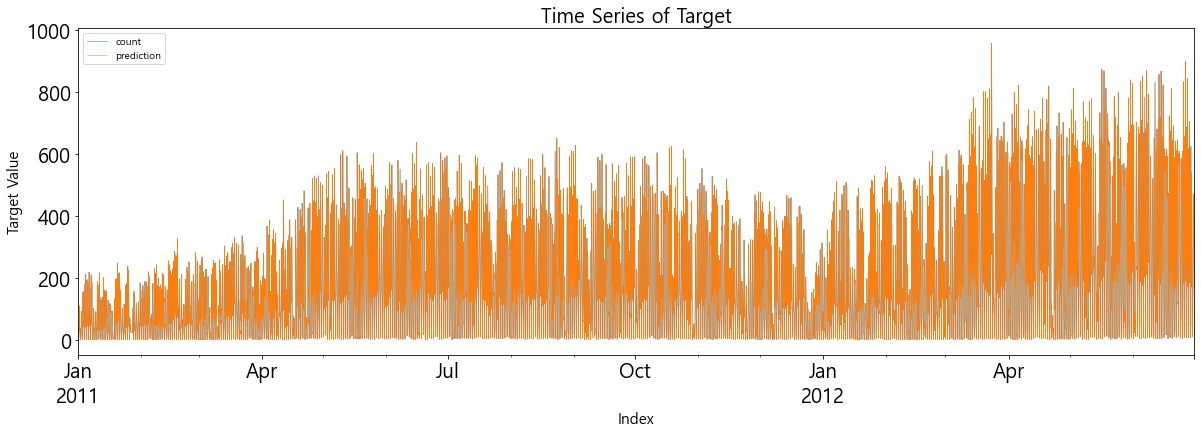

In [50]:
# precision comparisions
result.plot(figsize=(20, 6), linewidth=0.5, fontsize=20,
            xlim=(y_train.index.min(), y_train.index.max()))

plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Target Value', fontsize=15)
plt.show()

In [51]:
MAE = abs(y_train.values.flatten() - pred_tr_reg1).mean()
MSE = ((y_train.values.flatten() - pred_tr_reg1)**2).mean()
MAPE = (abs(y_train.values.flatten() - pred_tr_reg1) / y_train.values.flatten()*100).mean()

pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T

,MAE,MSE,MAPE
Score,0.01,0.04,0.06


In [52]:
fit_reg1 = sm.OLS(y_train, X_train).fit()
pred_tr_reg1 = fit_reg1.predict(X_train).values
pred_te_reg1 = fit_reg1.predict(X_test).values

### Evaluation of 1 pair of set
def evaluation(y_real, y_pred):
    loss_length = len(y_real.values.flatten()) - len(y_pred)
    if loss_length != 0:
        y_real = y_real[loss_length:]
        
    MAE = abs(y_train.values.flatten() - pred_tr_reg1).mean()
    MSE = ((y_train.values.flatten() - pred_tr_reg1)**2).mean()
    MAPE = (abs(y_train.values.flatten() - pred_tr_reg1) / y_train.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(y_real.values.flatten() - y_pred, index=y_real.index, columns=['Error'])
    
    return Score, Residual

### EValuation of train/test pairs
def evaluation_trte(y_real_tr, y_pred_tr, y_real_te, y_pred_te):
    Score_tr, Residual_tr = evaluation(y_real_tr, y_pred_tr)
    Score_te, Residual_te = evaluation(y_real_te, y_pred_te)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index= ['Train', 'Test']
    
    return Score_trte, Residual_tr, Residual_te

Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(y_train, pred_tr_reg1, y_test, pred_te_reg1)
Score_reg1

,MAE,MSE,MAPE
Train,0.01,0.04,0.06
Test,0.01,0.04,0.06


## 잔차진단 시각화
### White Noise 시각화
- 첫번째 데이터는 굉장히 튀는 데이터(아웃라이어)이기 때문에 이를 제외하고 시각화함

In [53]:
# 인덱스마다 번호 붙이기
Resid_tr_reg1['RowNum'] = Resid_tr_reg1.reset_index().index
Resid_tr_reg1.head()

,Error,RowNum
datetime,,
2011-01-01 00:00:00,-23.95,0
2011-01-01 01:00:00,0.04,1
2011-01-01 02:00:00,0.04,2
2011-01-01 03:00:00,0.04,3
2011-01-01 04:00:00,0.04,4


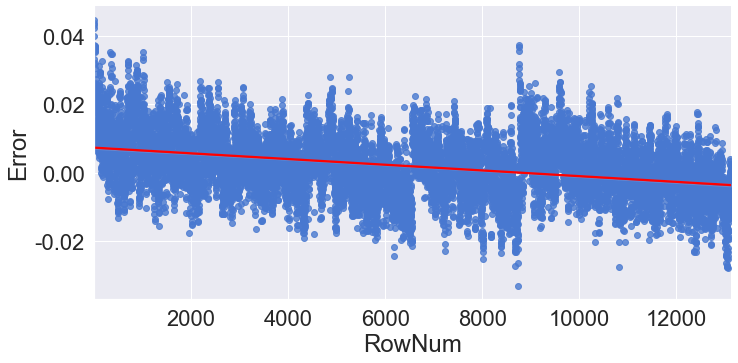

In [54]:
sns.set(palette='muted', color_codes=True, font_scale=2)
sns.lmplot(data=Resid_tr_reg1.iloc[1:], 
           x='RowNum', y='Error', fit_reg=True, 
           line_kws={'color':'red'}, size=5.2, aspect=2, ci=99, sharey=True);

- White Noise가 아니다.(아래쪽으로 감소하는 추세가 보임) -> 정상시계열이 아님
### 정규분포 시각화

<AxesSubplot:xlabel='Error', ylabel='Density'>

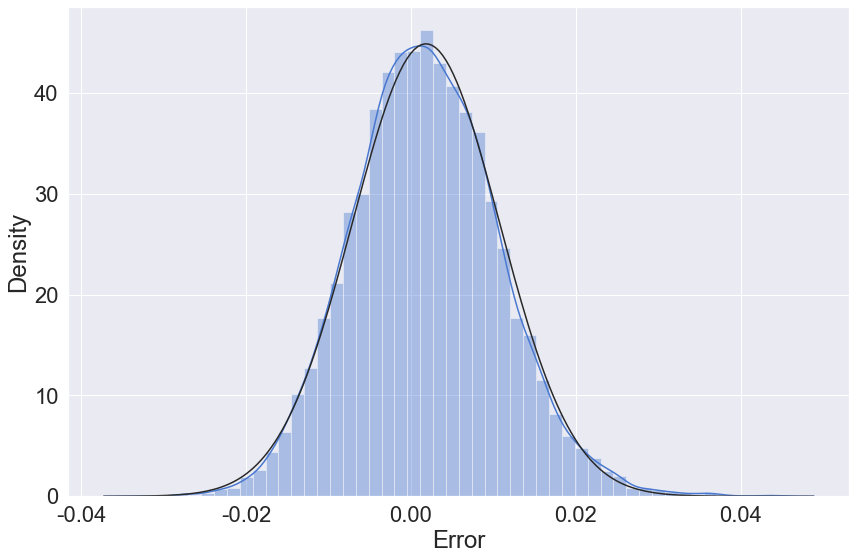

In [56]:
# norm_hist=True: 히스토그램으로 그린다.
sns.distplot(Resid_tr_reg1['Error'].iloc[1:], norm_hist=True, fit=stats.norm)

### 자기상관관계 시각화

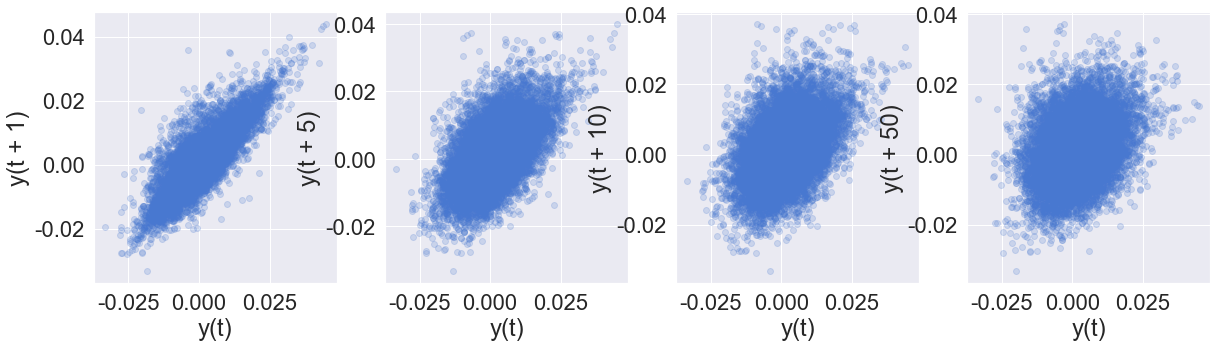

In [64]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:], lag=1, ax=ax[0], alpha=0.2)
pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:], lag=5, ax=ax[1], alpha=0.2)
pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:], lag=10, ax=ax[2], alpha=0.2)
pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:], lag=50, ax=ax[3], alpha=0.2);